<a href="https://colab.research.google.com/github/ganesh12112/ganesh12112/blob/main/session_21_ai_and_ml_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# multiple linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup_df = pd.read_csv("/content/50_Startups.csv")

In [10]:
startup_df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [11]:
startup_df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [12]:
startup_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
# column transformation
#string col = categorical value - numerical value(discrete value)
# one way - using pandas(getdummies) and in sklearn (one hot encoding)
yes_no = pd.Series(['Yes','No','Yes','No','Yes','No','Yes','No','Yes','No','Yes','No'])

In [14]:
yes_no

0     Yes
1      No
2     Yes
3      No
4     Yes
5      No
6     Yes
7      No
8     Yes
9      No
10    Yes
11     No
dtype: object

In [15]:
pd.get_dummies(yes_no)

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
5,1,0
6,0,1
7,1,0
8,0,1
9,1,0


In [16]:
state_data = pd.get_dummies(startup_df['State'],drop_first = True)

In [17]:
state_data.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [18]:
startup_df.drop(axis = 1,labels = 'State')

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [19]:
startup_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [20]:
startup_data = pd.concat([state_data,startup_df],axis = 1)

In [21]:
startup_data.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,1,165349.20,136897.80,471784.10,New York,192261.83
1,0,0,162597.70,151377.59,443898.53,California,191792.06
2,1,0,153441.51,101145.55,407934.54,Florida,191050.39
3,0,1,144372.41,118671.85,383199.62,New York,182901.99
4,1,0,142107.34,91391.77,366168.42,Florida,166187.94


In [22]:
# every input considered as x values and weight added in the form of coeffients
# one intercept and 5 coefficients
# y = b0x1+b1x2+.....bnxn+c
# this is same as representation of equation of straight line  y = mx+c

In [23]:
x = np.array(startup_data.iloc[:,0:5])

In [24]:
x

array([[0.0000000e+00, 1.0000000e+00, 1.6534920e+05, 1.3689780e+05,
        4.7178410e+05],
       [0.0000000e+00, 0.0000000e+00, 1.6259770e+05, 1.5137759e+05,
        4.4389853e+05],
       [1.0000000e+00, 0.0000000e+00, 1.5344151e+05, 1.0114555e+05,
        4.0793454e+05],
       [0.0000000e+00, 1.0000000e+00, 1.4437241e+05, 1.1867185e+05,
        3.8319962e+05],
       [1.0000000e+00, 0.0000000e+00, 1.4210734e+05, 9.1391770e+04,
        3.6616842e+05],
       [0.0000000e+00, 1.0000000e+00, 1.3187690e+05, 9.9814710e+04,
        3.6286136e+05],
       [0.0000000e+00, 0.0000000e+00, 1.3461546e+05, 1.4719887e+05,
        1.2771682e+05],
       [1.0000000e+00, 0.0000000e+00, 1.3029813e+05, 1.4553006e+05,
        3.2387668e+05],
       [0.0000000e+00, 1.0000000e+00, 1.2054252e+05, 1.4871895e+05,
        3.1161329e+05],
       [0.0000000e+00, 0.0000000e+00, 1.2333488e+05, 1.0867917e+05,
        3.0498162e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0191308e+05, 1.1059411e+05,
        2.29

In [25]:
y = np.array(startup_data.iloc[:,-1])

In [26]:
y = y.reshape((-1,1))

In [27]:
y

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6 ],
       [152211.77],
       [149759.96],
       [146121.95],
       [144259.4 ],
       [141585.52],
       [134307.35],
       [132602.65],
       [129917.04],
       [126992.93],
       [125370.37],
       [124266.9 ],
       [122776.86],
       [118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [ 99937.59],
       [ 97483.56],
       [ 97427.84],
       [ 96778.92],
       [ 96712.8 ],
       [ 96479.51],
       [ 90708.19],
       [ 89949.14],
       [ 81229.06],
       [ 81005.76],
       [ 78239.91],
       [ 77798.83],
       [ 71498.49],
       [ 69758.98],
       [ 65200.33],
       [ 64926.08],
       [ 49490.75],
       [ 42559.73],
       [ 35673.41],
       [ 14681.4 ]])

In [28]:
print(x.shape)
print(y.shape)

(50, 5)
(50, 1)


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2022)

In [30]:
print("shape of training input",x_train.shape)
print("shape of training output",y_train.shape)

print(x_test.shape)
print(y_test.shape)

shape of training input (40, 5)
shape of training output (40, 1)
(10, 5)
(10, 1)


In [31]:
# create an object(model)
# training the model by the fit method
# testing the model by score or predict method
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()

In [32]:
mlr.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred = mlr.predict(x_test)

In [34]:
for i in range(0,len(y_pred)):
  print("Actual:",y_test[i],"and predict:",y_pred[i])

Actual: [14681.4] and predict: [52767.59258466]
Actual: [81229.06] and predict: [68144.13172833]
Actual: [69758.98] and predict: [60201.92754488]
Actual: [182901.99] and predict: [170003.62532324]
Actual: [149759.96] and predict: [156831.27144109]
Actual: [156122.51] and predict: [162245.93896409]
Actual: [96479.51] and predict: [88741.62477312]
Actual: [71498.49] and predict: [74085.54483638]
Actual: [155752.6] and predict: [159564.69579049]
Actual: [35673.41] and predict: [50021.62332638]


In [35]:
mlr.score(x,y)

0.9468439097333593

In [36]:
# sklearn used for predictive machine learning and not for statistics model
# here we have to use stats model - useful for adusted r2 in multiple linear regression
# ordinary least sum of squares - from the stats model

In [37]:
import statsmodels.formula.api as smf

In [38]:
# statsmodel - intercept is not added automatically so we have one more column called const
# giving all the values as 1 in that column, when it is multipled it remains same
# intercept = slope of the graph

In [39]:
np.ones((50,1)).astype(int)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [40]:
x

array([[0.0000000e+00, 1.0000000e+00, 1.6534920e+05, 1.3689780e+05,
        4.7178410e+05],
       [0.0000000e+00, 0.0000000e+00, 1.6259770e+05, 1.5137759e+05,
        4.4389853e+05],
       [1.0000000e+00, 0.0000000e+00, 1.5344151e+05, 1.0114555e+05,
        4.0793454e+05],
       [0.0000000e+00, 1.0000000e+00, 1.4437241e+05, 1.1867185e+05,
        3.8319962e+05],
       [1.0000000e+00, 0.0000000e+00, 1.4210734e+05, 9.1391770e+04,
        3.6616842e+05],
       [0.0000000e+00, 1.0000000e+00, 1.3187690e+05, 9.9814710e+04,
        3.6286136e+05],
       [0.0000000e+00, 0.0000000e+00, 1.3461546e+05, 1.4719887e+05,
        1.2771682e+05],
       [1.0000000e+00, 0.0000000e+00, 1.3029813e+05, 1.4553006e+05,
        3.2387668e+05],
       [0.0000000e+00, 1.0000000e+00, 1.2054252e+05, 1.4871895e+05,
        3.1161329e+05],
       [0.0000000e+00, 0.0000000e+00, 1.2333488e+05, 1.0867917e+05,
        3.0498162e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0191308e+05, 1.1059411e+05,
        2.29

In [41]:
x_for_statsmodel = np.append(arr=np.ones((50,1)).astype(int),values = x ,axis = 1)

In [42]:
from statsmodels.regression.linear_model import OLS

In [43]:
# in built method to perform regression
# exog - dependent variables
# endog - independent variables
# if we want to add intercept we can use stats.tools method it add constants to the data
model = OLS(exog= x_for_statsmodel,endog = y)

In [44]:
# regression ,clasification and neural networks - the p value remains the same
model = model.fit()

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           2.50e-10
Time:                        02:52:33   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
x1             0.3237      0.131      2.468      0.017       0.060       0.588
x2             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
x_for_statsmodel = x_for_statsmodel[:,[0,1]]
model = OLS(endog = y,exog= x_for_statsmodel)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           4.38e-10
Time:                        02:58:49   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
x1             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x[:,[2,4]],y,test_size = 0.2,random_state = 2022)

In [63]:
print("shape of training input",x_train.shape)
print("shape of training output",y_train.shape)

print(x_test.shape)
print(y_test.shape)

shape of training input (40, 2)
shape of training output (40, 1)
(10, 2)
(10, 1)


In [64]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [65]:
y_pred2 = mlr.predict(x_test)

In [67]:
for i in range(0,len(y_pred)):
  print("Actual:",y_test[i],"and predict:",y_pred2[i],"and previous predict:" ,y_pred[i])

Actual: [14681.4] and predict: [51174.79193186] and previous predict: [52767.59258466]
Actual: [81229.06] and predict: [69864.69018128] and previous predict: [68144.13172833]
Actual: [69758.98] and predict: [63214.64954248] and previous predict: [60201.92754488]
Actual: [182901.99] and predict: [171632.52373673] and previous predict: [170003.62532324]
Actual: [149759.96] and predict: [153514.05894593] and previous predict: [156831.27144109]
Actual: [156122.51] and predict: [158947.62447454] and previous predict: [162245.93896409]
Actual: [96479.51] and predict: [90594.41237291] and previous predict: [88741.62477312]
Actual: [71498.49] and predict: [71827.06147807] and previous predict: [74085.54483638]
Actual: [155752.6] and predict: [159374.49890503] and previous predict: [159564.69579049]
Actual: [35673.41] and predict: [50719.89400343] and previous predict: [50021.62332638]


In [72]:
mlr.score(x[:,[2,4]],y)

0.9487804650595292

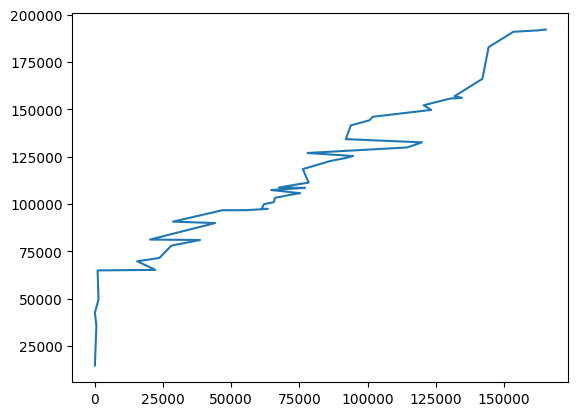

In [73]:
plt.plot(x[:,2],y)

In [ ]:
# few algorithms
# ploynomial regression
import
